# Consumer Review Analysis
## Group 66
## Members:
*   EG/2020/4331 - Arshad A.H.M
*   EG/2020/4327 - Infas N.M


### import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

### import the dataset


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [55]:
# importing the dataset
df = pd.read_csv('./data_amazon.xlsx - Sheet1.csv')

### Data Analysing & preprocessing

In [6]:
# viewing the first part of dataset
df.head(6)

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses,0.0,1.0,1.0,0.0,0.0


In [7]:
# statistical analysis of numerical columns of the dataset
df.describe()

,Cons_rating,Materials,Construction,Color,Finishing,Durability
count,49124.000000,5741.000000,5743.000000,5742.000000,5737.000000,5734.000000
mean,4.099463,0.306567,0.504092,0.259840,0.265818,0.214161
std,1.283707,0.474515,0.500375,0.452657,0.441807,0.425305
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,9.000000,2.000000,9.000000,1.000000,9.000000


In [8]:
# display all the columns
df.columns


Index(['Title', 'Review', 'Cons_rating', 'Cloth_class', 'Materials',
       'Construction', 'Color', 'Finishing', 'Durability'],
      dtype='object')

In [9]:
# counting different values in rating
df['Cons_rating'].value_counts()

Cons_rating
5.0    28359
4.0     8267
3.0     5350
1.0     3827
2.0     3321
Name: count, dtype: int64

In [10]:
# no of records
df.shape

(49338, 9)

In [11]:
# more information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


#### Null values handeling



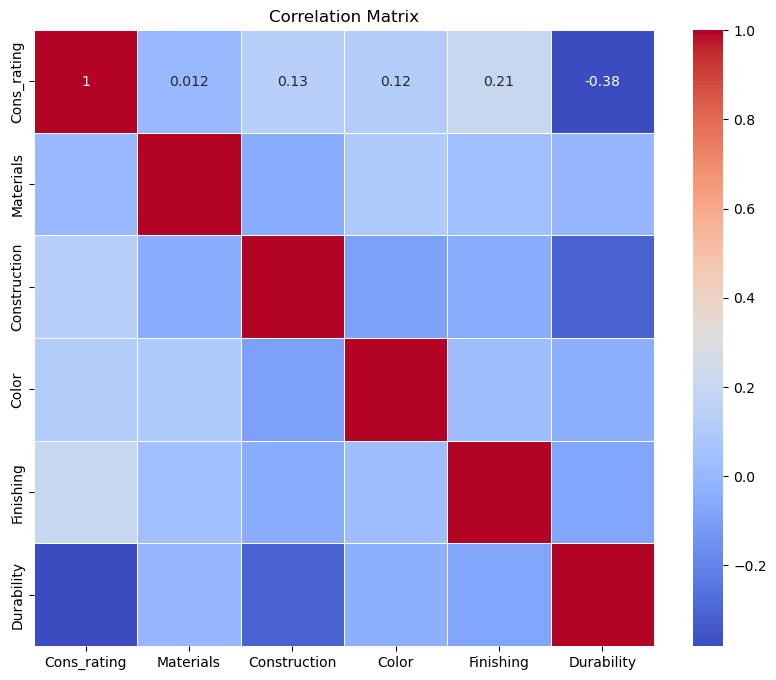

In [56]:
# Select the relevant columns from the DataFrame
selected_columns = ['Cons_rating', 'Materials', 'Construction', 'Color', 'Finishing', 'Durability']
correlation_matrix = df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# here we can see that the correlation for between Cons_rating and other variable. those are not a strong correlation
# tharefore we can drop those columns


columns_to_drop = ['Materials', 'Construction', 'Color', 'Finishing', 'Durability']
df = df.drop(columns=columns_to_drop)


In [14]:
df.head(6)

,Title,Review,Cons_rating,Cloth_class
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses


In [15]:
# sum of the missing values
df.isnull().sum()

Title          3968
Review          831
Cons_rating     214
Cloth_class      16
dtype: int64

<Axes: >

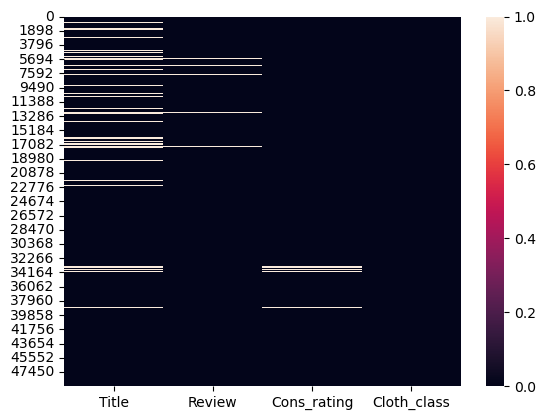

In [16]:
#plotting the heatmap. white color defines the nul values
sns.heatmap(data=df.isnull())

In [17]:
# dropping the missing values because missing values are small compared to the dataset
df = df.dropna()

<Axes: >

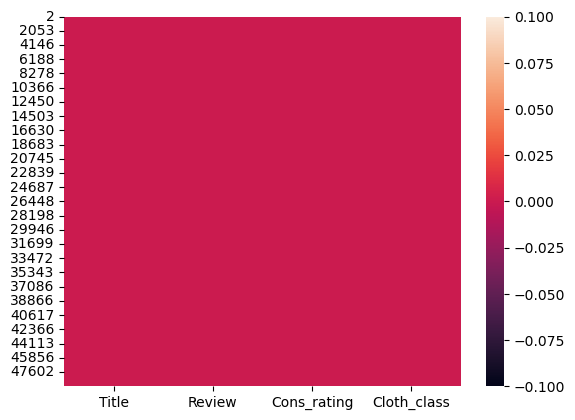

In [18]:
# plotting the heatmap again. here we can see that there is no null values
sns.heatmap(data=df.isnull())

In [19]:
df.isnull().sum()

Title          0
Review         0
Cons_rating    0
Cloth_class    0
dtype: int64

In [20]:
df.shape


(45308, 4)

In [21]:
# statistical datas related to dataset features
df.describe()

,Cons_rating
count,45308.000000
mean,4.086541
std,1.296556
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:

df['Cons_rating'].value_counts()

Cons_rating
5.0    26097
4.0     7483
3.0     4947
1.0     3667
2.0     3114
Name: count, dtype: int64

In [23]:
df['Cloth_class'].value_counts()

Cloth_class
Dresses           7639
Blouses           5042
Knits             3981
Jeans             3772
Sweaters          3638
Pants             3436
Jackets           3114
Shorts            3021
Sleep             2722
Shirts            2498
Blazer            1768
Suits             1309
Fine gauge         927
Skirts             796
Lounge             574
Swim               293
Outerwear          281
Legwear            131
Intimates          120
Layering           115
Trend              107
Dress               22
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

In [24]:
# as we are interested in review and ratings we can drop cloth_class and Title
df=df.drop(columns=['Title','Cloth_class'])

In [25]:
df.head()

,Review,Cons_rating
2,I had such high hopes for this dress and reall...,3.0
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0
4,This shirt is very flattering to all due to th...,5.0
5,"I love tracy reese dresses, but this one is no...",2.0
6,I aded this in my basket at hte last mintue to...,5.0


#### Data cleaning


##### data cleaning is the main part in this analysis as we are processing the text data.

In [26]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk. download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:

from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [28]:
# 1. convert all the words into lowercase and removing punctuations
def clean_data1(text):
  text = [word.lower() for word in text]
  no_punct=[letter for letter in text if letter not in string.punctuation]
  words_wo_punct=''.join(no_punct)
  return words_wo_punct
df['cleaned_review_1']=df['Review'].apply(lambda x: clean_data1(x))
df.head()


,Review,Cons_rating,cleaned_review_1
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...


In [29]:
# 2. removing unnecessary letters and brackets
def clean_data2(text):
  text = [re.sub(r"[0-9]", "",words) for words in text]             #removing numbers
  text = [re.sub(r"(\(.*\))|(\[.*\])", "",words) for words in text] #removing brackets
  text = [re.sub(r"[^\w\s]", "", words) for words in text]          #removing symbols
  text = ''.join(text)
  return text

df['cleaned_review_2']=df['cleaned_review_1'].apply(lambda x: clean_data2(x))
df.head()


,Review,Cons_rating,cleaned_review_1,cleaned_review_2
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...,i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...


In [30]:
# 3. tokenize the strings (splitting the string into words)
# and removing stop words (is, are, therefore ....)

def clean_data3(text):
  STOPWORDS = set(stopwords.words('english'))
  STOPWORDS.remove('not')                           # because "not" word is used for showing the dislikes
  tokenized = word_tokenize(text)                   # also we can use tokenized=re.split("\W+",text)
  cleaned_wo_sw = [word for word in tokenized if word not in STOPWORDS]
  return cleaned_wo_sw

df['cleaned_review_3']=df['cleaned_review_2'].apply(lambda x: clean_data3(x))
df.head()

,Review,Cons_rating,cleaned_review_1,cleaned_review_2,cleaned_review_3
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti..."
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...,i love tracy reese dresses but this one is not...,"[love, tracy, reese, dresses, one, not, petite..."
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...,"[aded, basket, hte, last, mintue, see, would, ..."


In [31]:
# 4.Lemmatization (converts the words into base form eg: believes -> belief)
def clean_data4(text):
  lemmatizer = WordNetLemmatizer()
  lemmatized_data = [lemmatizer.lemmatize(word) for word in text]
  return lemmatized_data

df['cleaned_review_4']=df['cleaned_review_3'].apply(lambda x: clean_data4(x))
df.head()

,Review,Cons_rating,cleaned_review_1,cleaned_review_2,cleaned_review_3,cleaned_review_4
2,I had such high hopes for this dress and reall...,3.0,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,5.0,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti..."
5,"I love tracy reese dresses, but this one is no...",2.0,i love tracy reese dresses but this one is not...,i love tracy reese dresses but this one is not...,"[love, tracy, reese, dresses, one, not, petite...","[love, tracy, reese, dress, one, not, petite, ..."
6,I aded this in my basket at hte last mintue to...,5.0,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...,"[aded, basket, hte, last, mintue, see, would, ...","[aded, basket, hte, last, mintue, see, would, ..."


In [32]:
# cleaned_review4 column is replaced the review
df['Review']=df['cleaned_review_4']


In [33]:
# dropping unwanted columns
df=df.drop(columns=['cleaned_review_1','cleaned_review_2','cleaned_review_3','cleaned_review_4'])
df.head()


,Review,Cons_rating
2,"[high, hope, dress, really, wanted, work, init...",3.0
3,"[love, love, love, jumpsuit, fun, flirty, fabu...",5.0
4,"[shirt, flattering, due, adjustable, front, ti...",5.0
5,"[love, tracy, reese, dress, one, not, petite, ...",2.0
6,"[aded, basket, hte, last, mintue, see, would, ...",5.0


In [34]:
def categorize_rating(rating):
    if rating > 3:
        return 'Positive'
    elif rating < 2 :
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorize_rating function to categorize the rating as negative(1,2),positive(3,4),and neutral(3)
df['Cons_rating'] = df['Cons_rating'].apply(lambda x: categorize_rating(x))

In [35]:
# we have to joined the words as sentences because vectorization cannot be done with the array of words
df['Review'] = [' '.join(text) for text in df['Review'] ]

In [36]:
df.head()


,Review,Cons_rating
2,high hope dress really wanted work initially o...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
5,love tracy reese dress one not petite foot tal...,Neutral
6,aded basket hte last mintue see would look lik...,Positive


In [37]:
#making copies of df
df2 = df.copy()
df3 = df.copy()

### Training the model



####  1.Using only td idf vectorization.

In [38]:
# tf idf vectorizing . this converts the words into binary values
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)



In [39]:
# defining the X and Y 
X = df['Review']
Y = df['Cons_rating']

In [40]:
# spliytting the dataset. 80 % for training and others for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (36246,)
Size of y_train: (36246,)
Size of x_test: (9062,)
Size of y_test: (9062,)


In [42]:
# using the vectorization for train and test dataset
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
# Create a linear SVM classifier
classifier_linear = svm.SVC(kernel='linear')

# Train the model on the training set
classifier_linear.fit(x_train, y_train)

# Predictions on the training set
prediction_train = classifier_linear.predict(x_train)

# Predictions on the test set
prediction_test = classifier_linear.predict(x_test)

# Accuracy on the training set
accuracy_train = accuracy_score(y_train, prediction_train)

# Accuracy on the test set
accuracy_test = accuracy_score(y_test, prediction_test)

# Display accuracies
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Classification report on the test set
report_test = classification_report(y_test, prediction_test, output_dict=True)
print("Classification Report on Test Set:")
print(report_test)

Training Accuracy: 0.8608122275561442
Test Accuracy: 0.8270801147649526
Classification Report on Test Set:
{'Negative': {'precision': 0.6094674556213018, 'recall': 0.42213114754098363, 'f1-score': 0.4987893462469733, 'support': 732.0}, 'Neutral': {'precision': 0.5716429107276819, 'recall': 0.48504137492043287, 'f1-score': 0.5247933884297521, 'support': 1571.0}, 'Positive': {'precision': 0.8895042924397674, 'recall': 0.9504364550969078, 'f1-score': 0.9189614476789928, 'support': 6759.0}, 'accuracy': 0.8270801147649526, 'macro avg': {'precision': 0.690204886262917, 'recall': 0.6192029925194414, 'f1-score': 0.6475147274519061, 'support': 9062.0}, 'weighted avg': {'precision': 0.8117789343266794, 'recall': 0.8270801147649526, 'f1-score': 0.8166877774815976, 'support': 9062.0}}


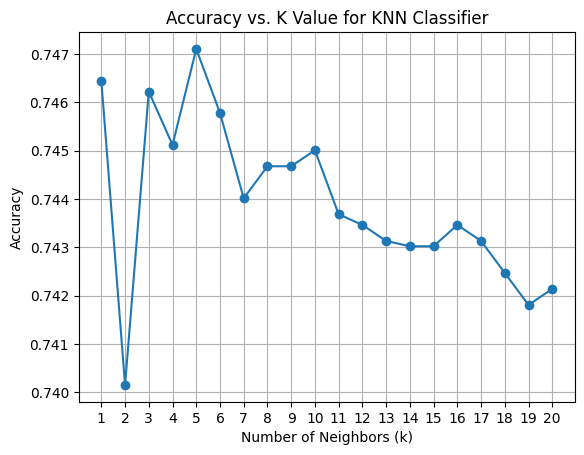

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# for finding the optimal k value this graph is plotted
k_values = np.arange(1, 21)  

# Initialize an empty list to store accuracy scores for each k
accuracy_scores = []

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)

    # Make predictions on the test set
    predictions = knn_classifier.predict(x_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value for KNN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_classifier.fit(x_train, y_train)

# Predictions on the training set
predictions_train_knn = knn_classifier.predict(x_train)

# Predictions on the test set
predictions_test_knn = knn_classifier.predict(x_test)

# Accuracy on the training set
accuracy_train_knn = accuracy_score(y_train, predictions_train_knn)

# Accuracy on the test set
accuracy_test_knn = accuracy_score(y_test, predictions_test_knn)

# Display accuracies
print("Training Accuracy:", accuracy_train_knn)
print("Test Accuracy:", accuracy_test_knn)


Training Accuracy: 0.7602218175798708
Test Accuracy: 0.7529242992716839


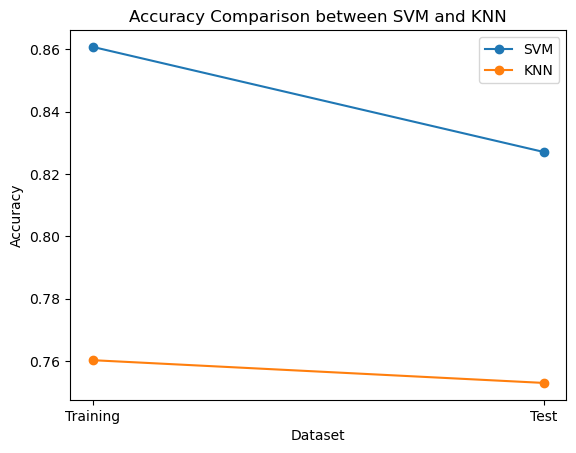

In [53]:
import matplotlib.pyplot as plt

# Accuracy values for SVM and KNN
svm_accuracies = [accuracy_train, accuracy_test]
knn_accuracies = [accuracy_train_knn, accuracy_test_knn]

# Labels for the categories
labels = ['Training', 'Test']

# Plotting the accuracies
plt.plot(labels, svm_accuracies, label='SVM', marker='o')
plt.plot(labels, knn_accuracies, label='KNN', marker='o')

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SVM and KNN')
plt.legend()


plt.show()


#### predicting output with the new data

In [ ]:
new_text = ["i like this dress"]

new_text = clean_data1(new_text);
new_text = clean_data2(new_text);
new_text = clean_data3(new_text);
new_text = clean_data4(new_text);
# Transform the new text using the same vectorizer
new_text_vectorized = vect.transform(new_text);

# Use the trained KNN model to predict the category for the new text
predicted_category = knn_classifier.predict(new_text_vectorized)

# Display the predicted category
print("Predicted Category:", predicted_category[0])

Predicted Category: Positive


#### To increase the accuracy we have used the N-Gram(Bigram and Trigram) method. but the accuracy got dropped. therefore, above model is the model with high accuracy.

#### 2.Using trigrams and vectorization.



In [46]:
df2.head()

,Review,Cons_rating
2,high hope dress really wanted work initially o...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
5,love tracy reese dress one not petite foot tal...,Neutral
6,aded basket hte last mintue see would look lik...,Positive


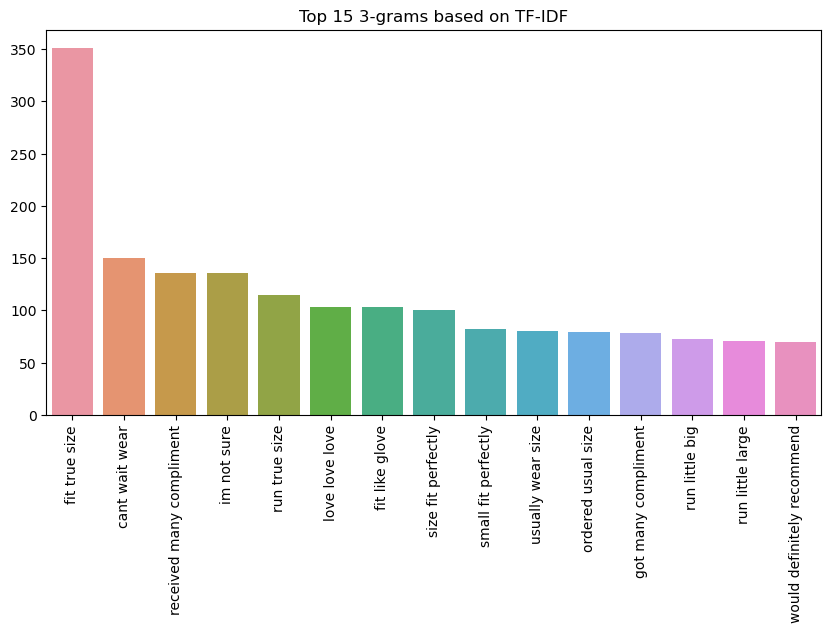

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer




# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1500,ngram_range=(3, 3))
X_tfidf = vectorizer.fit_transform(df2['Review'])
tfidf_array = X_tfidf.toarray()
df_tfidf = pd.DataFrame(data=tfidf_array, columns=vectorizer.get_feature_names_out())

# Sum TF-IDF scores and sort values
tfidf_sum = df_tfidf.sum().sort_values(ascending=False)[0:15] #only taking top 15 trigrams

# Plot bar chart
plt.figure(figsize=(10, 5))
g = sns.barplot(y=tfidf_sum, x=tfidf_sum.index)
plt.xticks(rotation=90)
plt.title('Top 15 3-grams based on TF-IDF')
plt.show()

# these are the most presented 3-grams(3-gram or trigram means 3 consecutive words presented in the review)


In [48]:
X = df2['Review']
Y = df2['Cons_rating']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (36246,)
Size of y_train: (36246,)
Size of x_test: (9062,)
Size of y_test: (9062,)


In [52]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [53]:

from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear


classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(x_train, y_train)

prediction_linear = classifier_linear.predict(x_test)

# results
report2 = classification_report(y_test, prediction_linear, output_dict=True)

accuracy2 = report2['accuracy']
print("Accuracy:", accuracy2)


Accuracy: 0.7575590377400132


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

predictions = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.41778856764511146


####  3.using bigram and vectorization

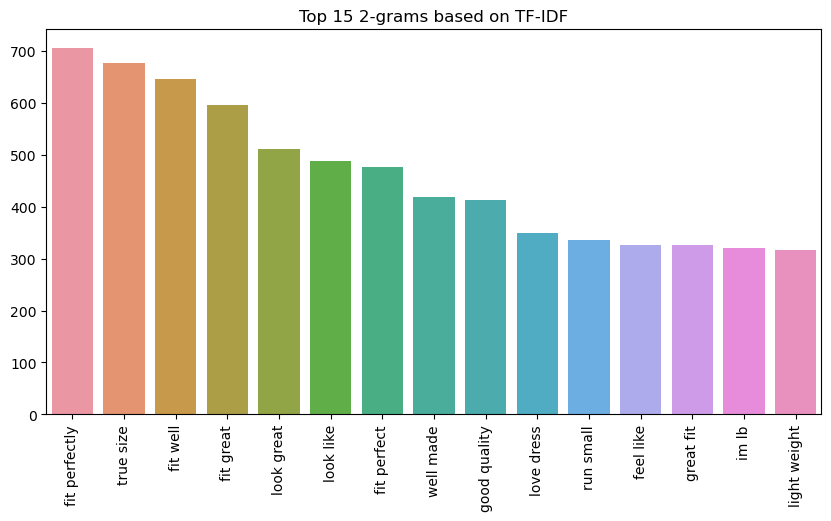

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=600, ngram_range=(2, 2))
X_tfidf = vectorizer.fit_transform(df2['Review'])
tfidf_array = X_tfidf.toarray()
df_tfidf = pd.DataFrame(data=tfidf_array, columns=vectorizer.get_feature_names_out())

# Sum TF-IDF scores and sort values
tfidf_sum = df_tfidf.sum().sort_values(ascending=False)[0:15]

# Plot bar chart
plt.figure(figsize=(10, 5))
g = sns.barplot(y=tfidf_sum, x=tfidf_sum.index)
plt.xticks(rotation=90)
plt.title('Top 15 2-grams based on TF-IDF')
plt.show()


# these are the most presented 2-grams(2-gram or bigram means 2 consecutive words presented in the review)

In [56]:
X = df2['Review']
Y = df2['Cons_rating']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (36246,)
Size of y_train: (36246,)
Size of x_test: (9062,)
Size of y_test: (9062,)


In [60]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [61]:

from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear


classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(x_train, y_train)

prediction_linear = classifier_linear.predict(x_test)

# results

report = classification_report(y_test, prediction_linear, output_dict=True)

accuracy = report['accuracy']
print("Accuracy:", accuracy)


Accuracy: 0.7743323769587288


In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

predictions = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.7317369234164643


### Accuracy comparition

##### This part compares the accuracy between above mentioned three methods. from the graph we can see that the method without using the ngram gives the best accuracy both in svm and knn

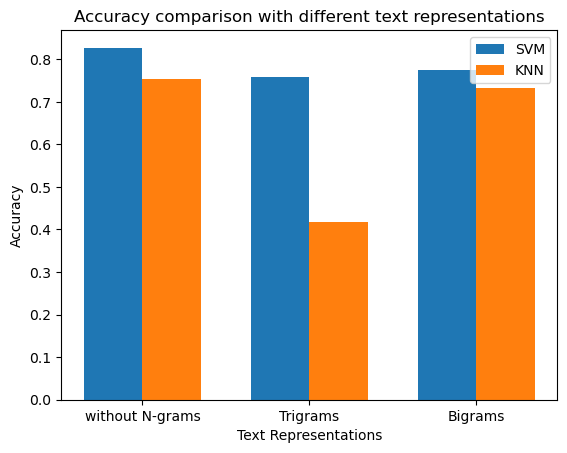

In [65]:

methods = ['without N-grams', 'Trigrams', 'Bigrams']
svm_accuracy = [0.8270801147649526, 0.7575590377400132, 0.7743323769587288]
knn_accuracy = [0.7529242992716839, 0.41778856764511146, 0.7317369234164643]

# Plotting
bar_width = 0.35
index = np.arange(len(methods))

fig, ax = plt.subplots()

rects1 = ax.bar(index, svm_accuracy, bar_width, label='SVM')
rects2 = ax.bar(index + bar_width, knn_accuracy, bar_width, label='KNN')

# Add labels, title, and legend
ax.set_xlabel('Text Representations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison with different text representations')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend()

# Show the plot
plt.show()